In [1]:
import mne                                                              # Librería de python para explorar, visualizar,
mne.set_log_level('WARNING')                                            # y analizar datos neurofisiológicos humanos.
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas

import a_funciones as a_fun                                             # Funciones Alex

xlabel = 'Muestra'                                                      # Abscisas
ylabel = 'Amplitud (uV)'                                                # Ordenadas

#### Señal P300S04

Elegí aleatoriamente un archivo del *P300-Dataset*.  

El zoom es deliberado entre plt.axis((140000,150000,-80,70)).  
Se cargan tres señales, una modelo y dos ERPs de pacientes de 29 años, hombres.  
Para el caso del ERPTemplate ahí está la info de los canales.  
Para los archivos P300S04 y P300S07 es distinto.  
El archivo .mat contiene una estructura de datos cuya info importante para éste trabajo es el 'routput'.  
De todo el archivo lo que se extrae es la estructura *['data'][0][0][0]*.  
  
• **stim** y **type** tienen algunas características similares, [La analicé en un mismo archivo](a_analisis_p300subject25_stim&type.ipynb)
• **trial**: Punto muestral donde se inicia cada uno de los 35 ensayos. [Acá podés ver un análisis mas detallado](a_analisis_trial.ipynb)  
• **flash**: Punto de muestra donde comienza cada parpadeo (id del punto de muestra, duración, estimulación, hit/no hit). [También podés ver mas en detalle ésta onda](a_analisis_flash.ipynb)  

Dispositivo: g.Tec g.Nautilus g.LadyBird, 250 Hz, filtro de muesca a 50 Hz, paso de banda 0,1-30 Hz
  
Este conjunto de datos se produjo utilizando el estándar 6x6 Donchin y Farewell P300 Speller Matrix, con un ISI de 0,125 ms.  
Hay 7 palabras con 5 letras cada una. Hay 10 secuencias de intensificación por letra.  
El procedimiento original usaba 3 palabras para el entrenamiento y trataba de decodificar las 4 palabras restantes para la prueba.  

#### Estructura de datos de P300S04.mat  
  
Son levemente distintas al ERPTemplate.mat  

'header' -> Info general del MAT-file.  
'version' -> 1.0.  
'globals' -> Vacío.  
  
'channelRange' -> Un array con los 8 canales. Si los querés tratar, los separás en un df.  
'Fs' > La Fs, frecuencua de muestreo: 250.  
'Trials' -> *Sample point where each of the 35 trials starts*.
'stims' -> 21482 rows × 3 columns, data.y_stim: Stimulation number: 1-6 rows, 7-12 cols.  
'channelNames' -> Etiqueta de cada uno de los 8 canales: # [FZ]	[CZ] [P3] [PZ] [P4]	[PO7] [PO8]	[OZ]  
'sampleTime' -> 355872 rows × 1 columns.
'samples' -> Acá hay una señal, no es un P300 como tal pero está.  
'Word'  
'data' -> El [0][0][0] se usa mas adelante.  



In [ ]:
#df_mat4_channelRange = pd.DataFrame(mat4['channelRange'])
#df_mat4_Fs = pd.DataFrame(mat4['Fs'])
#df_mat4_Trials = pd.DataFrame(mat4['Trials'])
#df_mat4_stims = pd.DataFrame(mat4['stims'])
#df_mat4_channelNames = pd.DataFrame(mat4['channelNames'])
#df_mat4_sampleTime = pd.DataFrame(mat4['sampleTime'])
#df_mat4_subject = pd.DataFrame(mat4['subject'])

Carga del *P300S04['data'][0][0][0]* y una breve descripción de su estructura.

In [2]:
P300S04 = scipy.io.loadmat('./dataset/P300S04.mat')       

P300S04_samples = pd.DataFrame(P300S04['samples'])
P300S04_samples = P300S04['samples']
P300S04_samples = a_fun.to_df(P300S04_samples)

print("P300S04:")   
print("1. Encabezado : ", sorted(P300S04))                                      #Informativo
print("2. Tipo : ", type(P300S04))

P300S04_data = pd.DataFrame(P300S04['data'][0][0][0])                          # Es igual -> signal = mat['data'][0][0][0]           
P300S04_data = P300S04['data'][0][0][0]
P300S04_data = a_fun.to_df(P300S04_data)

P300S04:
1. Encabezado :  ['Fs', 'Trials', 'Word', '__globals__', '__header__', '__version__', 'channelNames', 'channelRange', 'data', 'sampleTime', 'samples', 'stims', 'subject']
2. Tipo :  <class 'dict'>


Los ocho canales seleccionados en los EEG de éste trabajo son: 'FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ'.  
La paleta de colores definida para graficarlos es: *color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']*.  
A continuación, reorganizo el *describe* para tener los valores mínimos y máximos en cada uno de los canales.  


In [3]:
                                                                        #df_mat4_data.columns = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ'] #(OJO, SI LO AGREGO NO HACE EL FOR ABAJO)
                                                                        #df_mat4_samples.columns = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ'] #(OJO, SI LO AGREGO NO HACE EL FOR ABAJO)
describe = P300S04_samples.describe()
describe = describe.drop(['sample'], axis=1)
channelNames = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ']       # Queda pendiente extraerlo directamente del dataset -> channelNames = pd.DataFrame(P300S04['channelNames'])
channelRange = [0,1,2,3,4,5,6,7]                                        # Queda pendiente extraerlo directamente del dataset -> channelRange = pd.DataFrame(P300S04['channelRange']) -1
color = ['Verde', 'Azul','Rojo','Celeste', 'Magenta', 'Amarillo','Negro','Blanco'] 
filas = ['Número de canal','Color del canal','Valor mínimo', 'Valor máximo']
m = pd.DataFrame([channelRange, color, describe.iloc[3], describe.iloc[7]], columns=channelNames, index=filas)
m

,FZ,CZ,P3,PZ,P4,P07,PO8,OZ
Número de canal,0,1,2,3,4,5,6,7
Color del canal,Verde,Azul,Rojo,Celeste,Magenta,Amarillo,Negro,Blanco
Valor mínimo,-70.646057,-137.649551,-61.142323,-61.047009,-91.708542,-78.050255,-1514.828491,-67.566948
Valor máximo,63.589142,258.674927,59.404602,60.45615,128.368011,77.115242,1780.42102,91.254089


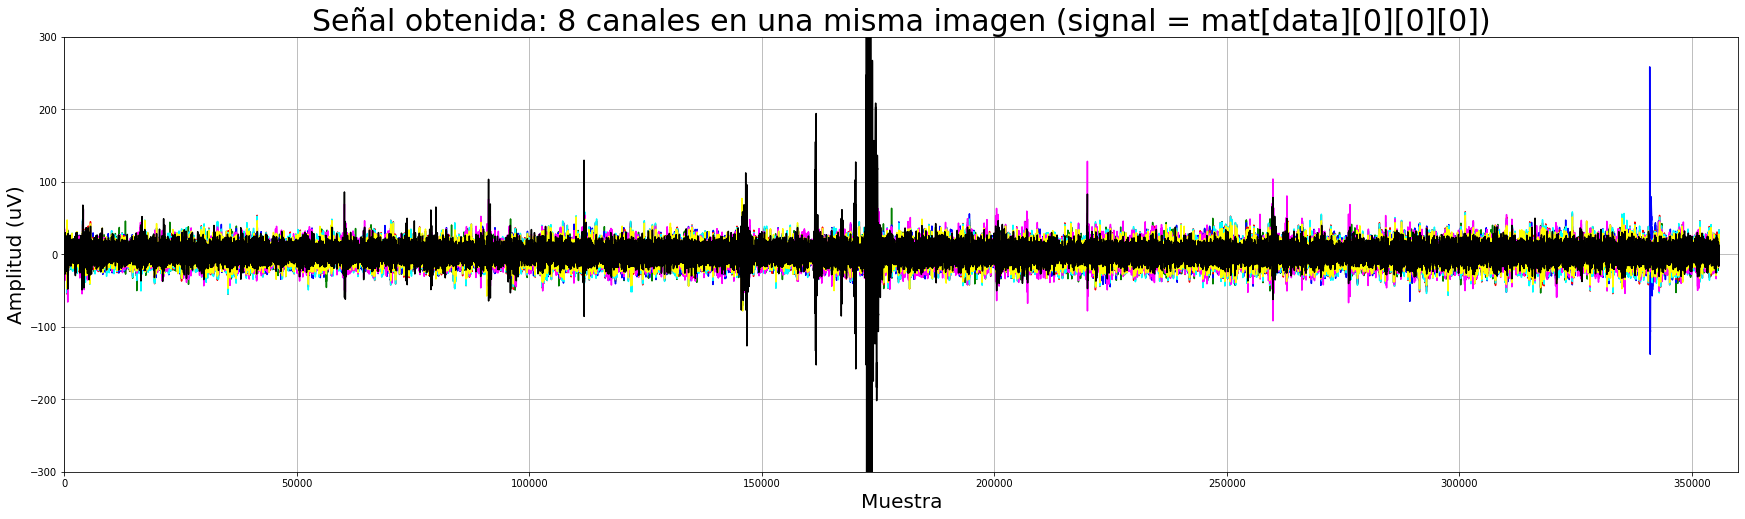

()

In [4]:
data_frame = P300S04_samples

titulo = 'Señal obtenida: 8 canales en una misma imagen (signal = mat[data][0][0][0])'
dir_savefig = "./a_images/01 - P300S04_8Ch.jpg"
a_fun.grafic_8ch(data_frame, titulo, xlabel, ylabel, dir_savefig)

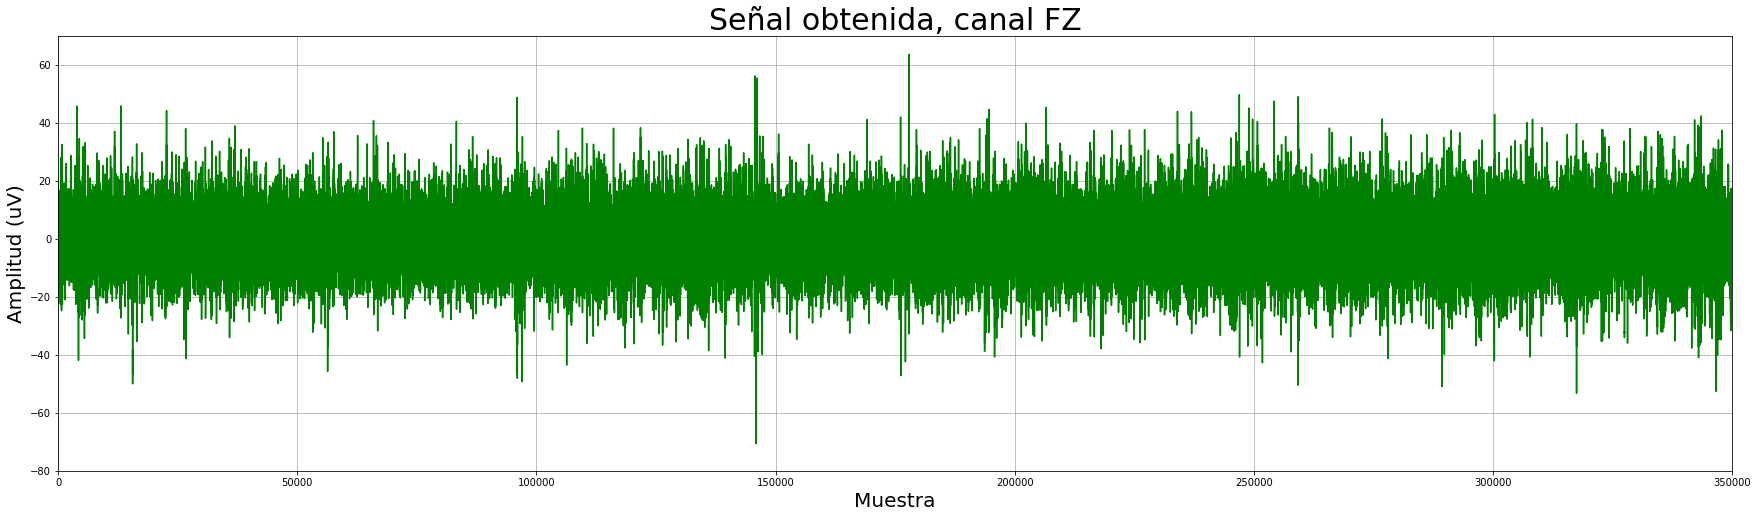

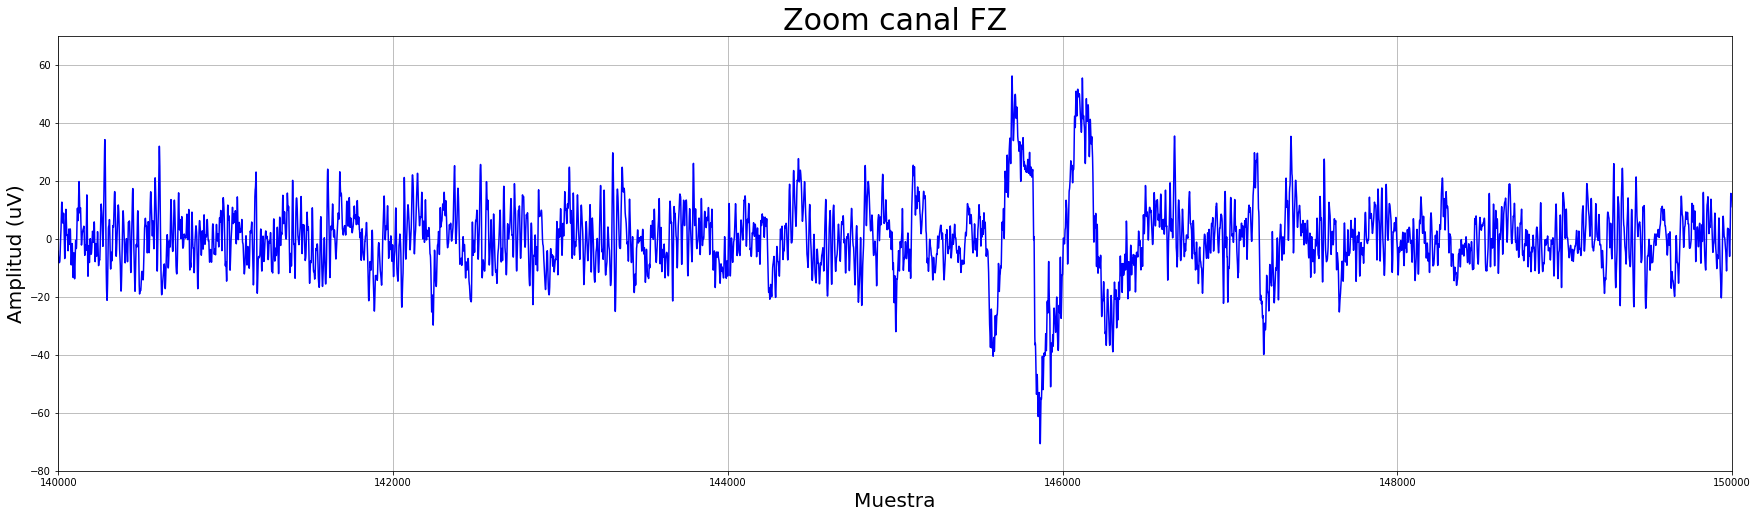

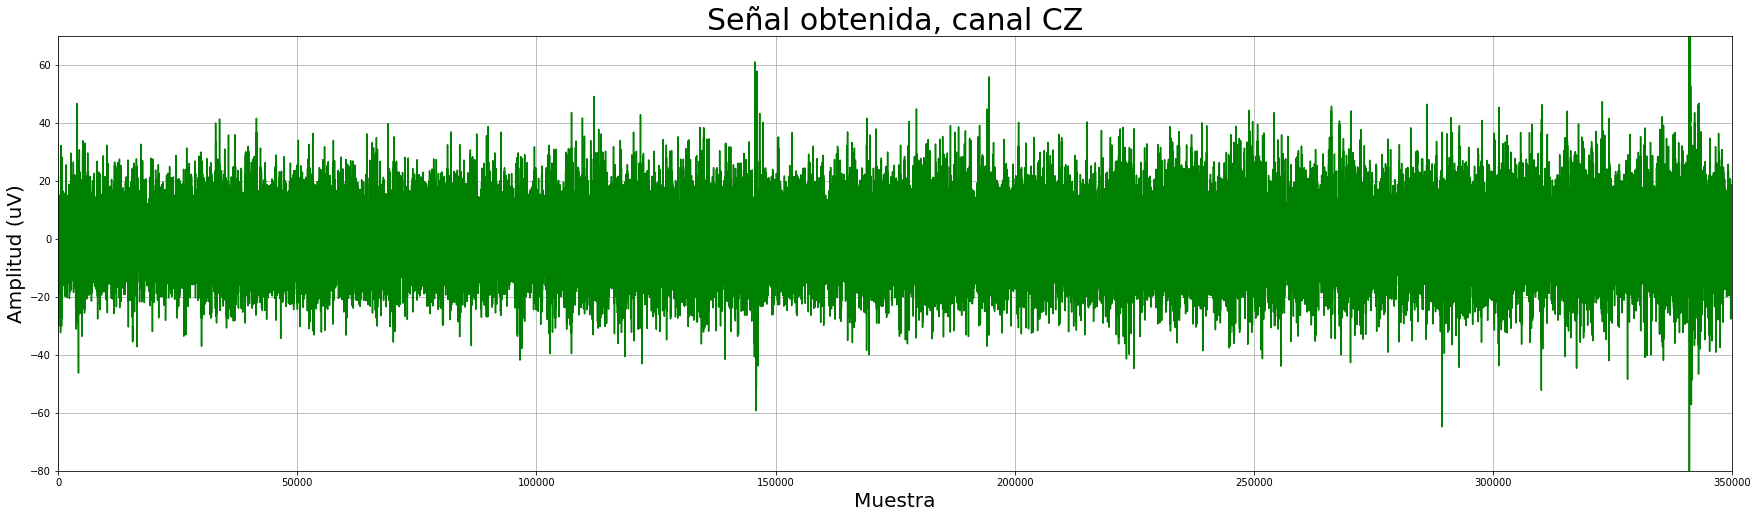

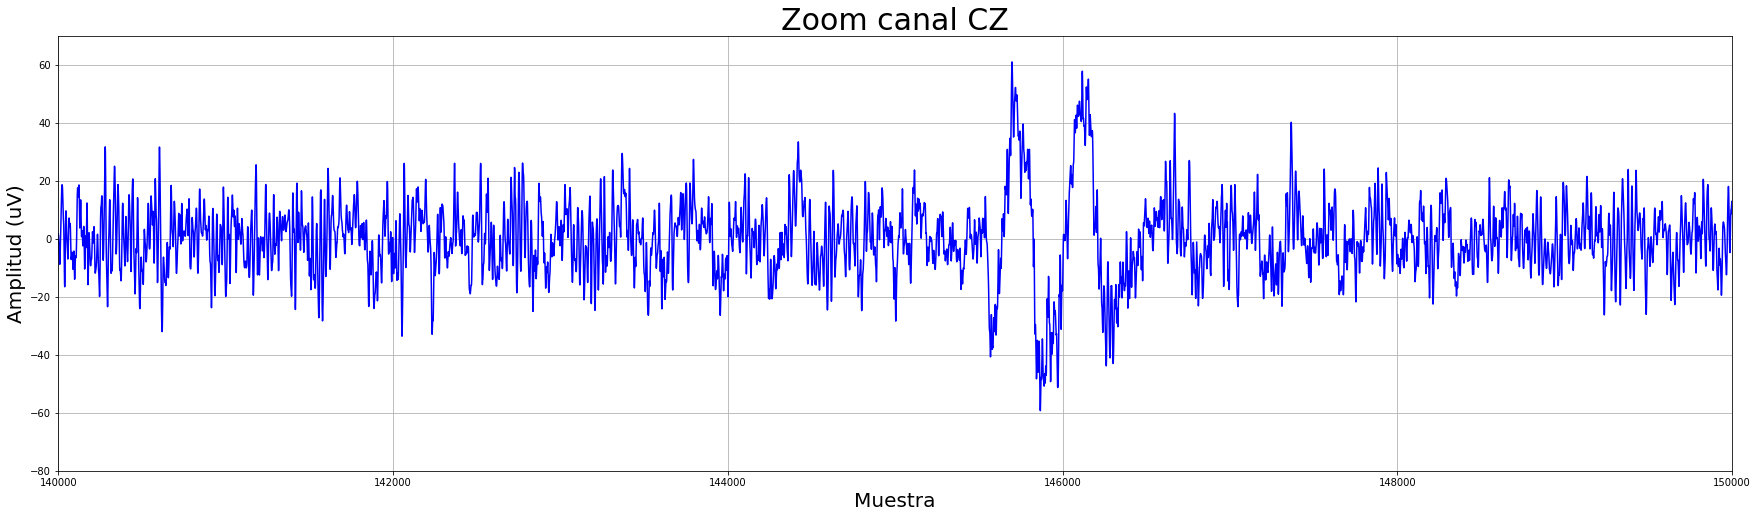

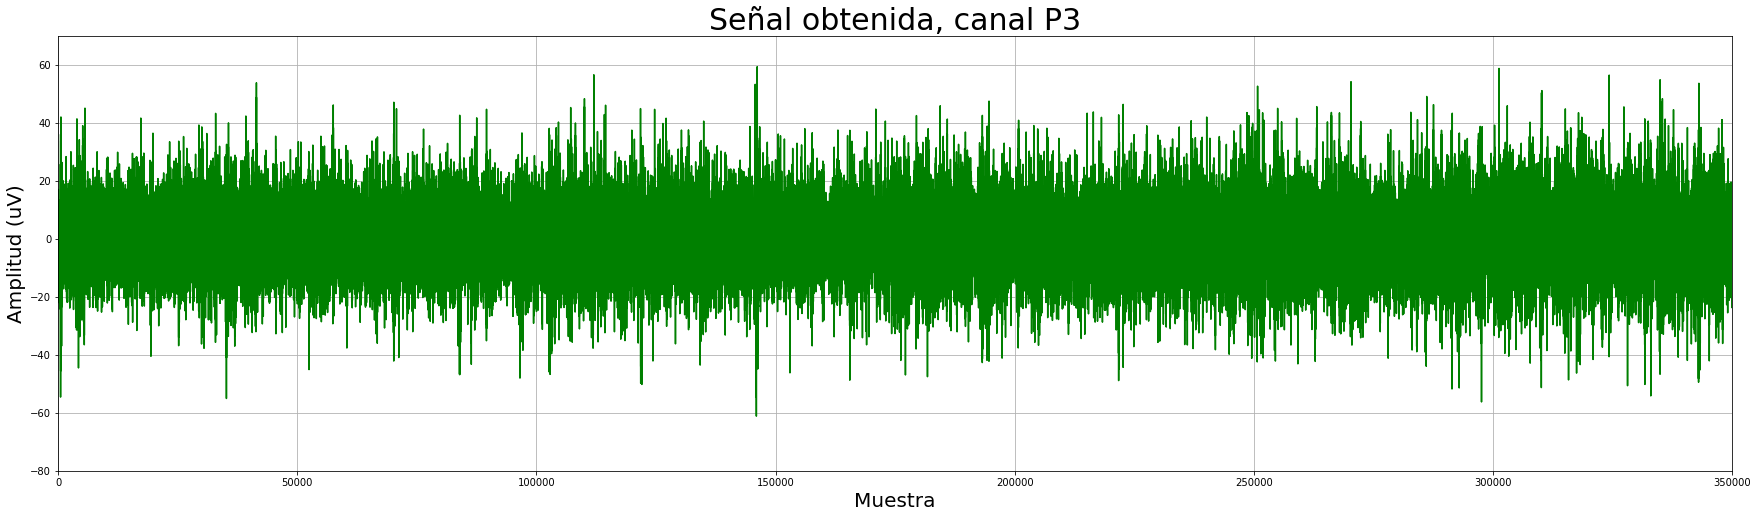

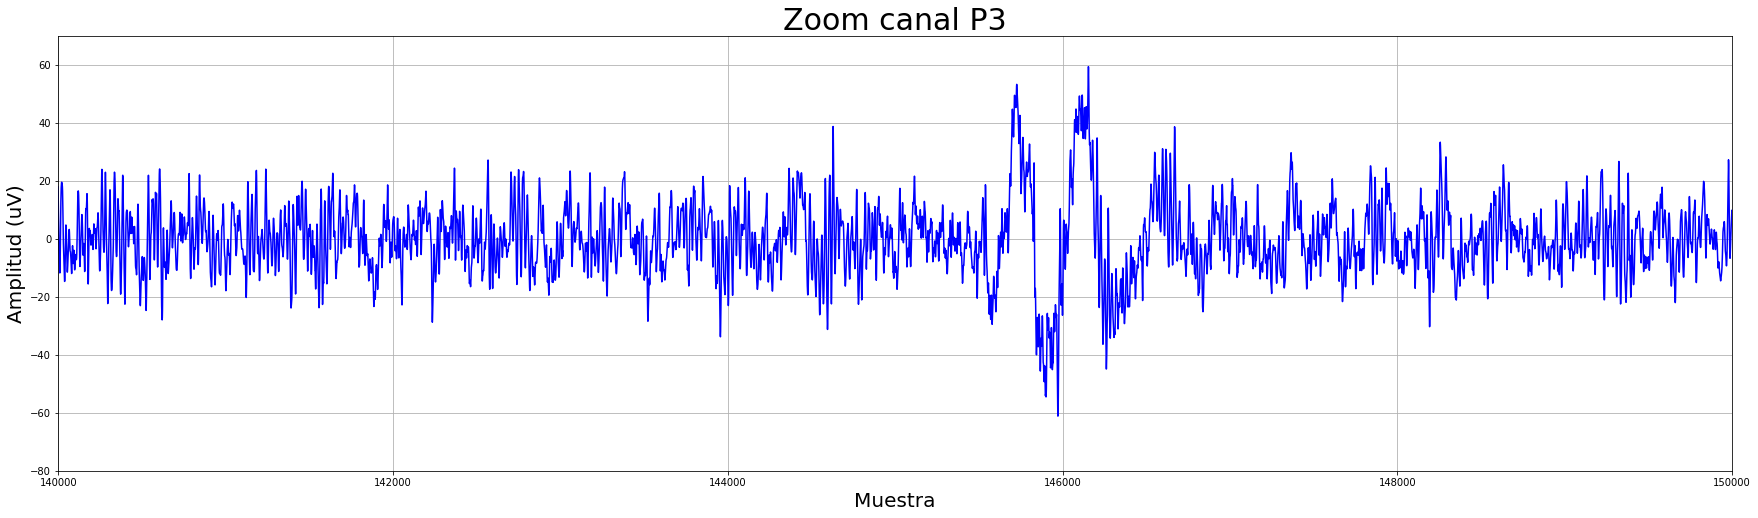

In [7]:
canalFZ = 0
titulo = 'Señal obtenida, canal FZ'
dir_savefig = "./a_images/02 - P300S04_ChFZ.jpg"
a_fun.grafic_1ch(data_frame, titulo, xlabel, ylabel, dir_savefig, canalFZ)
titulo = 'Zoom canal FZ'
dir_savefig = "./a_images/02 - P300S04_ChFZZoom.jpg"
a_fun.grafic_1chzoom(data_frame, titulo, xlabel, ylabel, dir_savefig, canalFZ)

canalCZ = 1
titulo = 'Señal obtenida, canal CZ'
dir_savefig = "./a_images/03- P300S04_ChCZ.jpg"
a_fun.grafic_1ch(data_frame, titulo, xlabel, ylabel, dir_savefig, canalCZ)
titulo = 'Zoom canal CZ'
dir_savefig = "./a_images/02 - P300S04_ChCZZoom.jpg"
a_fun.grafic_1chzoom(data_frame, titulo, xlabel, ylabel, dir_savefig, canalCZ)

canalP3 = 2
titulo = 'Señal obtenida, canal P3'
dir_savefig = "./a_images/04- P300S04_ChP3.jpg"
a_fun.grafic_1ch(data_frame, titulo, xlabel, ylabel, dir_savefig, canalP3)
titulo = 'Zoom canal P3'
dir_savefig = "./a_images/02 - P300S04_ChP3Zoom.jpg"
a_fun.grafic_1chzoom(data_frame, titulo, xlabel, ylabel, dir_savefig, canalP3)
